Automobile Sales Analysis and Visualization Dashboard

In [ ]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

print(df.columns)
print(df.head())


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443          

Task 1.1 - Line plot showing how automobile sales fluctuate from year to year

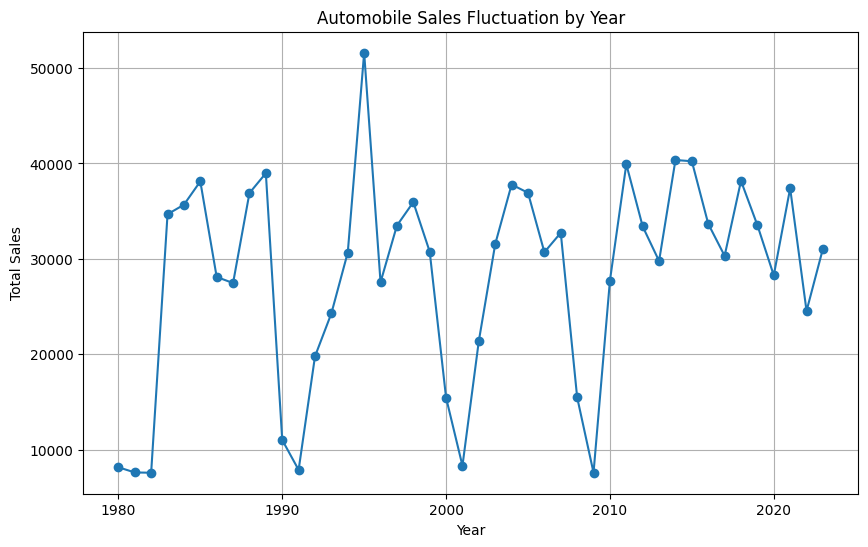

In [ ]:
import matplotlib.pyplot as plt

# Group sales by Year and sum the Sales
sales_by_year = df.groupby('Year')['Automobile_Sales'].sum()

plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.title('Automobile Sales Fluctuation by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.savefig('Line_plot_1.png')  # Save the plot as required
plt.show()


Task 1.2 - Plot different lines for categories of vehicle type and analyze sales trends during recession periods




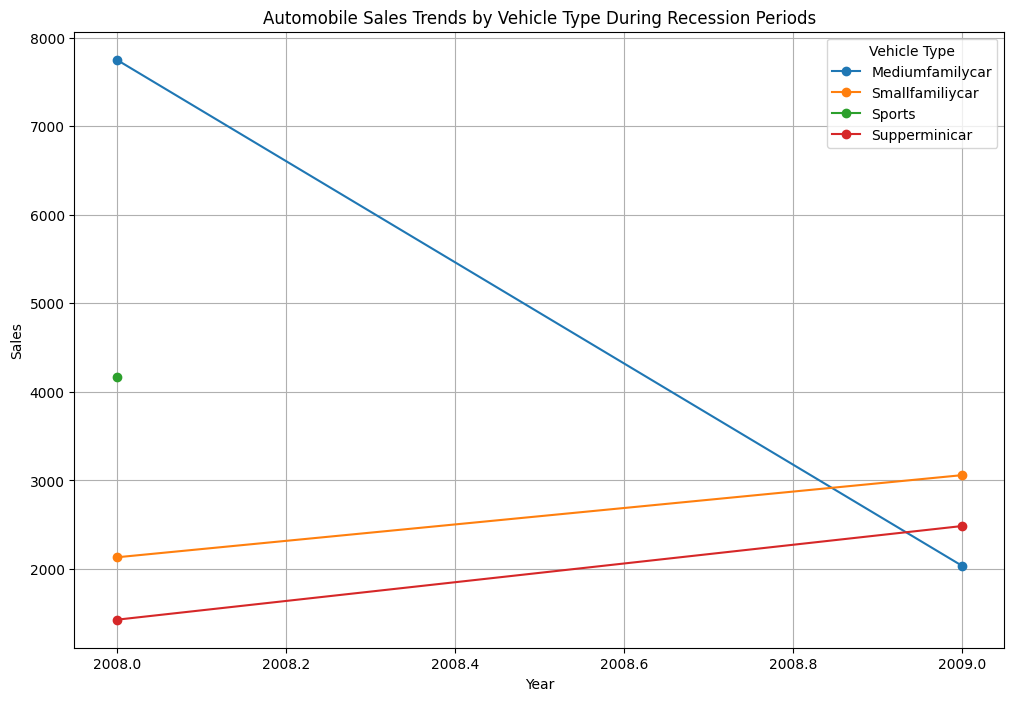

In [ ]:
plt.figure(figsize=(12,8))

# Filter data for recession period (assuming there's a column 'Recession' with True/False)
# If no such column, define recession years manually, for example 2008-2009 as recession years:
recession_years = list(range(2008, 2010))
df_recession = df[df['Year'].isin(recession_years)]

# Group by Year and Vehicle Type, sum sales
sales_by_year_type = df_recession.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot each vehicle type line
for vehicle_type in sales_by_year_type.columns:
    plt.plot(sales_by_year_type.index, sales_by_year_type[vehicle_type], marker='o', label=vehicle_type)

plt.title('Automobile Sales Trends by Vehicle Type During Recession Periods')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.savefig('Line_plot_2.png')
plt.show()


Task 1.3 - Seaborn visualization to compare sales trend per vehicle type for recession and non-recession periods


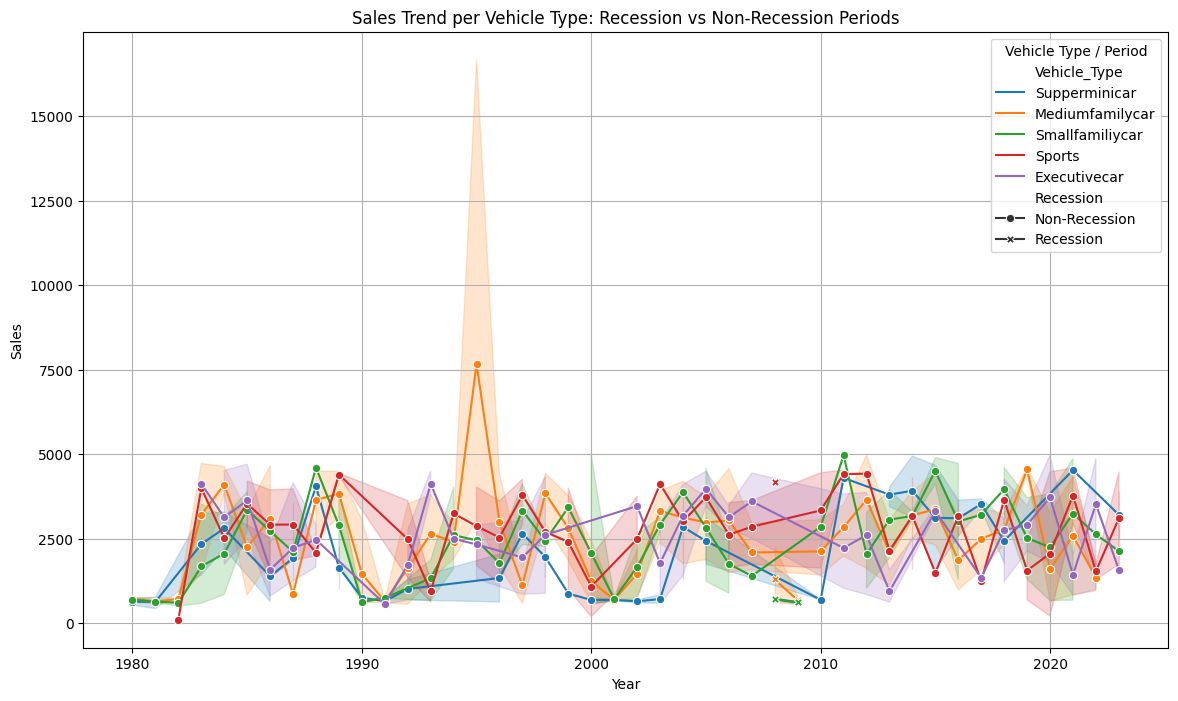

In [ ]:
import seaborn as sns

# Add a 'Recession' column based on year for easy filtering (adjust years as per your data)
df['Recession'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

plt.figure(figsize=(14,8))

# Use seaborn lineplot with hue for vehicle type and style for recession status
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', markers=True, dashes=False)

plt.title('Sales Trend per Vehicle Type: Recession vs Non-Recession Periods')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Vehicle Type / Period')
plt.grid(True)

plt.savefig('Bar_Chart.png')
plt.show()


Task 1.4 — Subplots for GDP during recession and non-recession periods



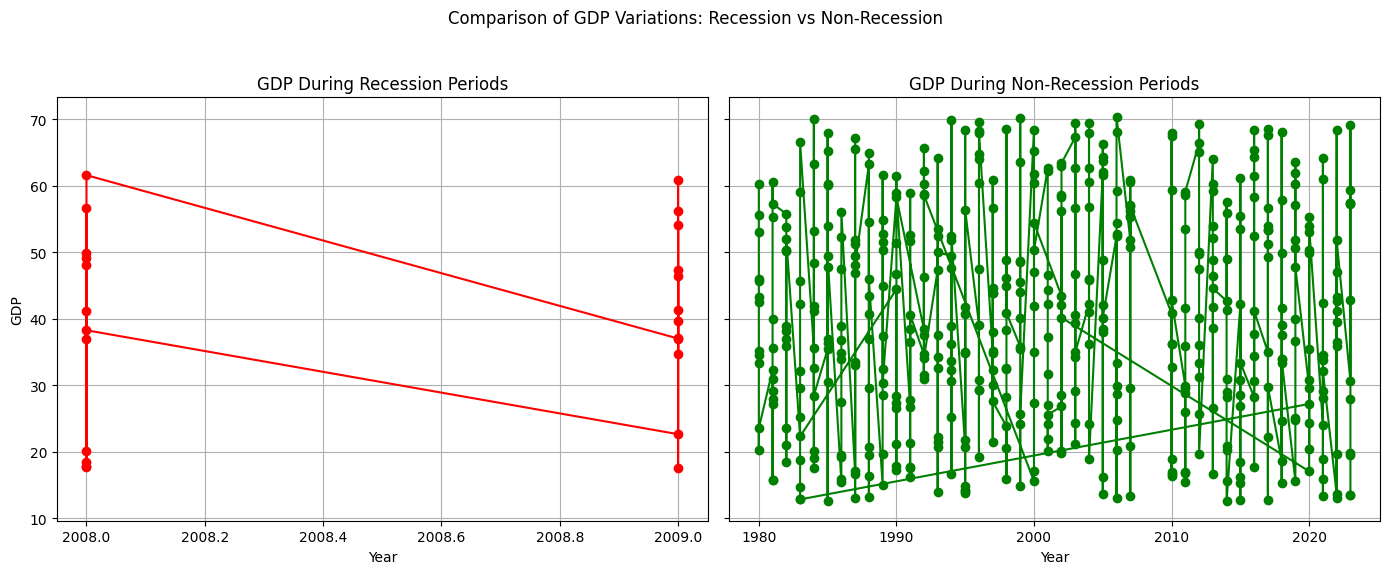

In [ ]:
import matplotlib.pyplot as plt

# Assume your dataframe has columns 'Year', 'GDP', and 'Recession' (True/False or similar)
# If 'Recession' is not boolean, create it:
df['Recession_flag'] = df['Year'].apply(lambda x: True if x in recession_years else False)

# Separate data
gdp_recession = df[df['Recession_flag'] == True]
gdp_non_recession = df[df['Recession_flag'] == False]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Plot GDP during recession
axes[0].plot(gdp_recession['Year'], gdp_recession['GDP'], marker='o', color='red')
axes[0].set_title('GDP During Recession Periods')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].grid(True)

# Plot GDP during non-recession
axes[1].plot(gdp_non_recession['Year'], gdp_non_recession['GDP'], marker='o', color='green')
axes[1].set_title('GDP During Non-Recession Periods')
axes[1].set_xlabel('Year')
axes[1].grid(True)

plt.suptitle('Comparison of GDP Variations: Recession vs Non-Recession')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('Subplot.png')
plt.show()


Task 1.5 — Bubble Plot for Seasonality impact on Automobile Sales

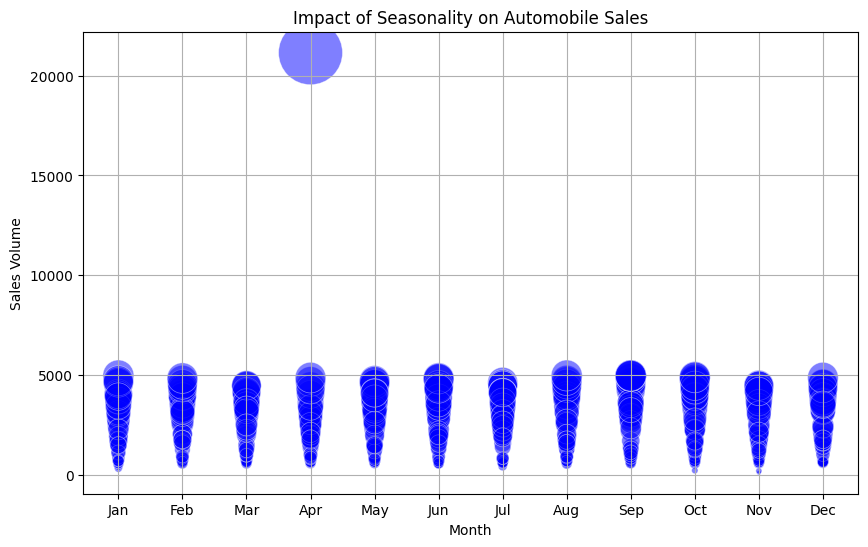

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataframe has these columns:
# 'Month' or 'Season' (categorical or numeric),
# 'Sales' (numeric),
# 'Year' or 'Vehicle_Type' (optional for color or grouping)

# For example, let's say 'Month' is numeric from 1 to 12
# Bubble size can be proportional to sales volume

plt.figure(figsize=(10,6))

# Example using 'Month', 'Sales'
# Size of bubbles proportional to Sales
plt.scatter(df['Month'], df['Automobile_Sales'],
            s=df['Automobile_Sales'] / 10,  # scale down size for visualization
            alpha=0.5,
            c='blue',
            edgecolors='w', linewidth=0.5)

plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.grid(True)

plt.savefig('Bubble.png')
plt.show()


Task 1.6 — Scatter Plot: Average Vehicle Price vs Sales Volume (During Recessions)

In [ ]:
print(df_recession.shape)
print(df_recession.head())


(0, 16)
Empty DataFrame
Columns: [Date, Year, Month, Recession, Consumer_Confidence, Seasonality_Weight, Price, Advertising_Expenditure, Competition, GDP, Growth_Rate, unemployment_rate, Automobile_Sales, Vehicle_Type, City, Recession_flag]
Index: []


In [ ]:
print(df['Recession'].unique())


['Non-Recession' 'Recession']


In [ ]:
print(df['Recession_flag'].unique())


[False  True]


In [ ]:
df_recession = df[df['Recession'] == 'Recession']


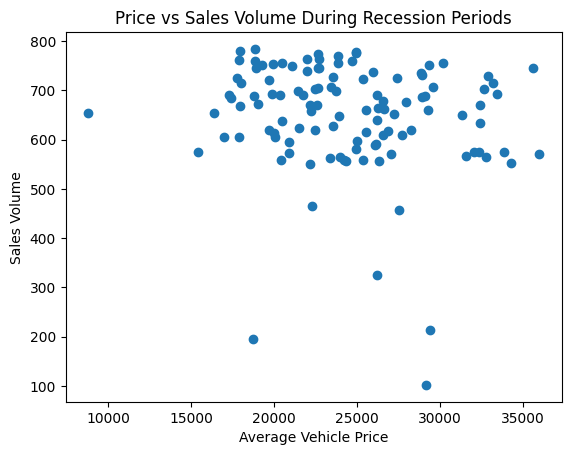

In [ ]:
df_recession = df[df['Recession'] == True]

plt.scatter(df_recession['Price'], df_recession['Automobile_Sales'])
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.title('Price vs Sales Volume During Recession Periods')
plt.savefig('Scatter.png')
plt.show()


Task 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

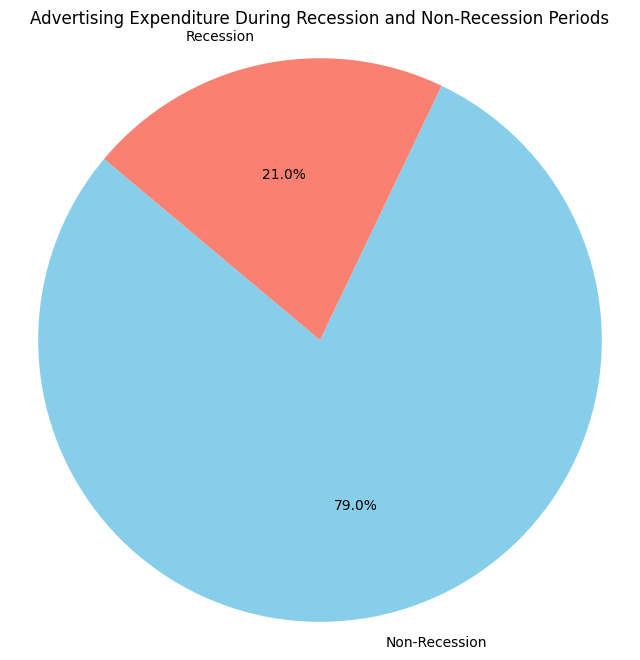

In [ ]:

# Aggregate advertising expenditure by recession status
ad_exp = df.groupby('Recession')['Advertising_Expenditure'].sum()

# Labels for pie chart
labels = ['Non-Recession', 'Recession']

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(ad_exp, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Advertising Expenditure During Recession and Non-Recession Periods')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.savefig('Pie_1.png')
plt.show()


Task 1.8
Develop a pie chart to display the total Advertising expenditure for each vehicle type during the recession period.





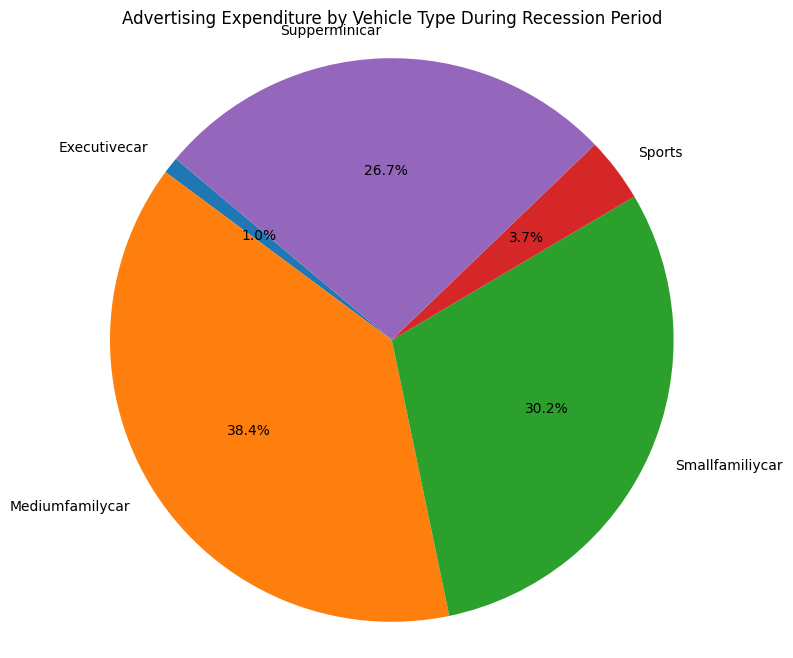

In [ ]:
import matplotlib.pyplot as plt

# Filter data for recession period only
df_recession = df[df['Recession'] == True]

# Aggregate Advertising Expenditure by Vehicle Type during recession
ad_exp_vehicle = df_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(ad_exp_vehicle, labels=ad_exp_vehicle.index, autopct='%1.1f%%', startangle=140)
plt.title('Advertising Expenditure by Vehicle Type During Recession Period')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.savefig('Pie_2.png')
plt.show()


Task 1.9
Develop a line plot to analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period.



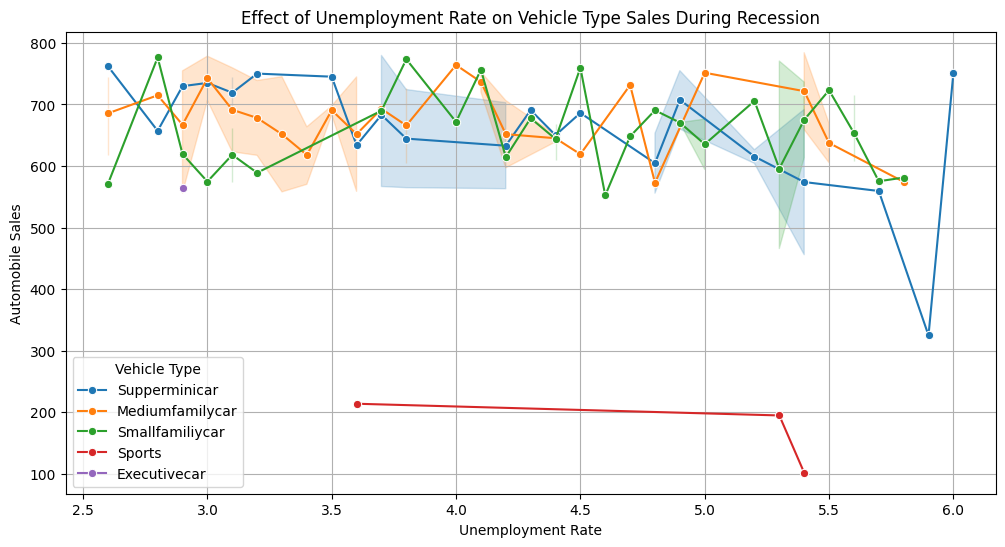

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for recession period
df_recession = df[df['Recession'] == True]

plt.figure(figsize=(12,6))

# Lineplot: x = unemployment rate, y = Automobile Sales, hue = Vehicle Type
sns.lineplot(data=df_recession, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

plt.title('Effect of Unemployment Rate on Vehicle Type Sales During Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.savefig('Line_plot_3.png')
plt.show()


Full Dashboard

In [59]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load your dataset (make sure df is loaded)
# df = pd.read_csv('your_file.csv')

app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"  # Task 2.1

# Precompute figures for dropdown options
years = df['Year'].unique()
vehicle_types = df['Vehicle_Type'].unique()

# Example figures for display
fig_recession = px.bar(df[df['Recession']==True], x='Vehicle_Type', y='Automobile_Sales', title="Recession Sales")
fig_yearly = px.line(df.groupby('Year')['Automobile_Sales'].sum().reset_index(), x='Year', y='Automobile_Sales', title="Yearly Sales")

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),  # Title

    # Task 2.2: Dropdowns
    html.Label('Select Report Type:'),
    dcc.Dropdown(
        id='report-type',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession'
    ),

    # Task 2.3: Output division
    html.Div(id='output-container', className='output-div'),

    # Graph placeholder
    dcc.Graph(id='report-graph')
])

# Task 2.4: Callback to update output based on dropdown
@app.callback(
    Output('output-container', 'children'),
    Output('report-graph', 'figure'),
    Input('report-type', 'value')
)
def update_report(report_type):
    if report_type == 'recession':
        text = "Showing Recession Report Statistics"
        fig = fig_recession
    else:
        text = "Showing Yearly Report Statistics"
        fig = fig_yearly
    return text, fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

Task 2.1
Create a Dash application and give it a meaningful title.

In [ ]:
# Install dash if needed
!pip install dash

import dash
from dash import html

# Initialize the app
app = dash.Dash(__name__)

# App layout with a title
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard")
])

if __name__ == '__main__':
    # The method run_server has been replaced by run in newer versions of Dash
    # Use app.run() instead of app.run_server()
    app.run(debug=True)

<IPython.core.display.Javascript object>

Task 2.2: Add Dropdowns

In [ ]:
from dash import dcc, html

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),

    html.Label("Select Vehicle Type:"),
    dcc.Dropdown(
        id='vehicle-type-dropdown',
        options=[
            {'label': 'Sedan', 'value': 'Sedan'},
            {'label': 'SUV', 'value': 'SUV'},
            {'label': 'Truck', 'value': 'Truck'},
            {'label': 'Coupe', 'value': 'Coupe'}
        ],
        value='Sedan'  # default value
    ),

    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[
            {'label': str(year), 'value': year} for year in range(2010, 2023)
        ],
        value=2020  # default value
    ),
])


Task 2.3 — Add a division (div) for output display with appropriate id and classname properties in your Dash app layout

In [ ]:
from dash import html

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),

    # Your dropdowns here (from previous task)
    # ...

    # Output container div
    html.Div(id='output-container', className='output-div')
])


Task 2.4 — Creating Callbacks to update the output container based on dropdown input

In [ ]:
from dash.dependencies import Input, Output

@app.callback(
    Output('output-container', 'children'),
    Input('your-dropdown-id', 'value')
)
def update_output(selected_value):
    # Example: just display the selected dropdown value as text
    return f'You have selected: {selected_value}'


Task 2.5 — Creating and displaying graphs for Recession Report Statistics in Dash with Plotly

In [ ]:
import plotly.express as px
from dash import dcc

# Sample DataFrame filtered for recession period
df_recession = df[df['Recession'] == 'Recession']

# Example: Bar chart of automobile sales by vehicle type during recession
fig_recession_sales = px.bar(
    df_recession.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index(),
    x='Vehicle_Type',
    y='Automobile_Sales',
    title='Automobile Sales by Vehicle Type During Recession'
)

# Add this graph to your app layout:
app.layout = html.Div([
    dcc.Graph(id='recession-sales-graph', figure=fig_recession_sales),
    # ... other components ...
])


Task 2.6 — Create and display graphs for Yearly Report Statistics in Dash with Plotly

In [ ]:
import plotly.express as px

# Aggregate yearly total sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()

# Aggregate yearly average price
yearly_avg_price = df.groupby('Year')['Price'].mean().reset_index()

# Line chart for total sales by year
fig_sales = px.line(yearly_sales, x='Year', y='Automobile_Sales',
                    title='Total Automobile Sales Per Year')

# Line chart for average vehicle price by year
fig_price = px.line(yearly_avg_price, x='Year', y='Price',
                    title='Average Vehicle Price Per Year')

# To display both graphs in Dash (example inside the layout)
from dash import html, dcc

app.layout = html.Div([
    html.H2("Yearly Report Statistics"),

    dcc.Graph(figure=fig_sales),
    dcc.Graph(figure=fig_price)
])


In [ ]:
@app.callback(
    Output('output-container', 'children'),
    Output('report-graph', 'figure'),
    Input('report-type', 'value')
)
def update_report(report_type):
    if report_type == 'recession':
        # ... recession figures ...
        return "Recession Report", fig_recession
    else:
        # For Yearly report, you can return one figure or create a combined figure
        return "Yearly Report", fig_sales  # or fig_price or create a subplot figure


In [ ]:
import plotly.express as px

# Aggregate yearly total sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()

# Aggregate yearly average price
yearly_avg_price = df.groupby('Year')['Price'].mean().reset_index()

# Line chart for total sales by year
fig_sales = px.line(yearly_sales, x='Year', y='Automobile_Sales',
                    title='Total Automobile Sales Per Year')

# Line chart for average vehicle price by year
fig_price = px.line(yearly_avg_price, x='Year', y='Price',
                    title='Average Vehicle Price Per Year')

# Display the figures
fig_sales.show()
fig_price.show()
